In [6]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end
include("../../Code/TSSs/src/TSSs.jl")
using CSV, DataFrames, StatsBase, NoLongerProblems
using PyPlot, ImageMagick, Images, ProgressMeter
using Seaborn, NoLongerProblems_Pandas, PrettyPlotting
import Pandas

using HypothesisTests
ENV["COLUMNS"] = 1000

1000

Progress: 100%|█████████████████████████████████████████| Time: 0:12:12


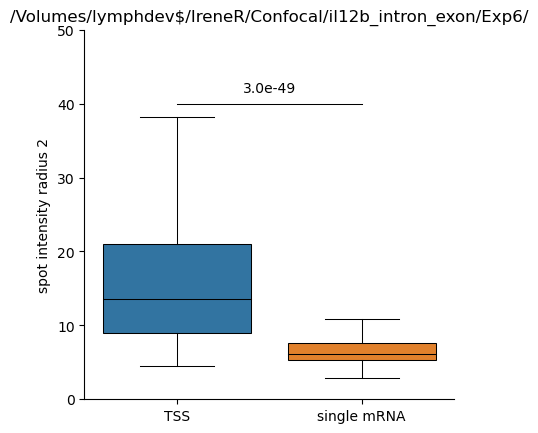

TSSs n: 318
dots n: 2531


In [7]:
ROOT4 = "/Volumes/lymphdev\$/IreneR/Confocal/il12b_intron_exon/Exp6/"
root1 = ROOT4
expn = 4
gene = "Il12b_intron_original"
tss_c4 = root1 * "Segmentation_type4/_FQ_outline/_TS_detect"
imagesfolder = root1 * "/tiff3D"
typesfolder = root1 * "type4"

quantd = TSSs.quantdots(imagesfolder, typesfolder)


tss_quant = CSV.read("../../Code_Paper/TSS_quantification/TSS_raw/Il12b_intron_original_exp4.csv", DataFrames.DataFrame)



tss_quant1 = tss_quant[!, [:Cell, :Image, :locus1_TSS2, :locus1_int2_TSS2]]
tss_quant2 = tss_quant[!, [:Cell, :Image, :locus2_TSS2, :locus2_int2_TSS2]]
rename!(tss_quant2, :locus2_int2_TSS2 => :Spot_r2 )
rename!(tss_quant1, :locus1_int2_TSS2 => :Spot_r2 )

rename!(tss_quant1, :locus1_TSS2 => :TSS )
rename!(tss_quant2, :locus2_TSS2 => :TSS)

tss_quant = vcat(tss_quant1,tss_quant2)

tss_quant = tss_quant[tss_quant[!,:Spot_r2].!=0.0, :]
tss_quant[!,:TSS_mRNA] = ["TSS" for ii in 1:nrow(tss_quant)]
quantd[!,:TSS_mRNA] = ["single mRNA" for ii in 1:nrow(quantd)]

tb = vcat(tss_quant[!, [:TSS_mRNA, :Spot_r2]], quantd[!, [:TSS_mRNA, :Spot_r2]])

pd = Pandas.DataFrame(tb)
Seaborn.boxplot(data = pd, x = "TSS_mRNA", y = "Spot_r2", showfliers = false)
test = round(pvalue(HypothesisTests.UnequalVarianceTTest(tss_quant[!,:Spot_r2],quantd[!,:Spot_r2])), sigdigits = 1)

plt.plot([0,1],[40, 40])

plt.annotate(string(test), xy = [0.5,42], va = "center", ha = "center")

ylim(0, 50)

title(root1)

pretty_axes2()
squareplot()
xlabel("")
line075black()
ylabel("spot intensity radius 2")

savefigwithtext("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".png")
savefigwithtext("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".svg")

CSV.write("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".csv", tb)
println(string("TSSs n: ", nrow(tss_quant)))
println(string("dots n: ", nrow(quantd)))

Progress: 100%|█████████████████████████████████████████| Time: 0:24:43


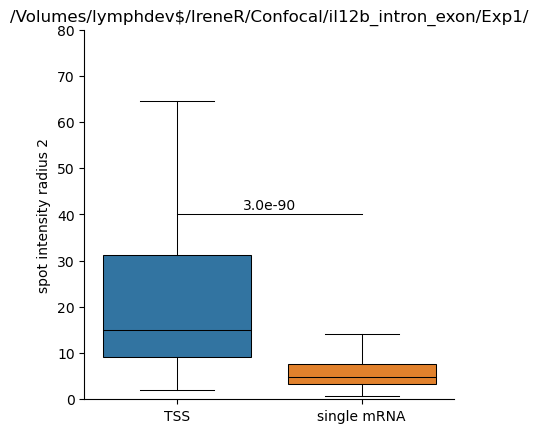

TSSs n: 928
dots n: 8789


In [8]:
ROOT4 = "/Volumes/lymphdev\$/IreneR/Confocal/il12b_intron_exon/Exp1/"
root1 = ROOT4
expn = 4
gene = "Il12b_intron_original"
tss_c4 = root1 * "Segmentation_type4/_FQ_outline/_TS_detect"
imagesfolder = root1 * "/tiff3D"
typesfolder = root1 * "type4"

quantd = TSSs.quantdots(imagesfolder, typesfolder)


tss_quant = CSV.read("../../Code_Paper/TSS_quantification/TSS_raw/Il12b_intron_original_exp1.csv", DataFrames.DataFrame)



tss_quant1 = tss_quant[!, [:Cell, :Image, :locus1_TSS2, :locus1_int2_TSS2]]
tss_quant2 = tss_quant[!, [:Cell, :Image, :locus2_TSS2, :locus2_int2_TSS2]]
rename!(tss_quant2, :locus2_int2_TSS2 => :Spot_r2 )
rename!(tss_quant1, :locus1_int2_TSS2 => :Spot_r2 )

rename!(tss_quant1, :locus1_TSS2 => :TSS )
rename!(tss_quant2, :locus2_TSS2 => :TSS)

tss_quant = vcat(tss_quant1,tss_quant2)

tss_quant = tss_quant[tss_quant[!,:Spot_r2].!=0.0, :]
tss_quant[!,:TSS_mRNA] = ["TSS" for ii in 1:nrow(tss_quant)]
quantd[!,:TSS_mRNA] = ["single mRNA" for ii in 1:nrow(quantd)]

tb = vcat(tss_quant[!, [:TSS_mRNA, :Spot_r2]], quantd[!, [:TSS_mRNA, :Spot_r2]])

pd = Pandas.DataFrame(tb)
Seaborn.boxplot(data = pd, x = "TSS_mRNA", y = "Spot_r2", showfliers = false)
test = round(pvalue(HypothesisTests.UnequalVarianceTTest(tss_quant[!,:Spot_r2],quantd[!,:Spot_r2])), sigdigits = 1)

plt.plot([0,1],[40, 40])

plt.annotate(string(test), xy = [0.5,42], va = "center", ha = "center")

ylim(0, 80)

title(root1)

pretty_axes2()
squareplot()
xlabel("")
line075black()
ylabel("spot intensity radius 2")

savefigwithtext("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".png")
savefigwithtext("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".svg")
CSV.write("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".csv", tb)
println(string("TSSs n: ", nrow(tss_quant)))
println(string("dots n: ", nrow(quantd)))

Progress: 100%|█████████████████████████████████████████| Time: 0:34:19


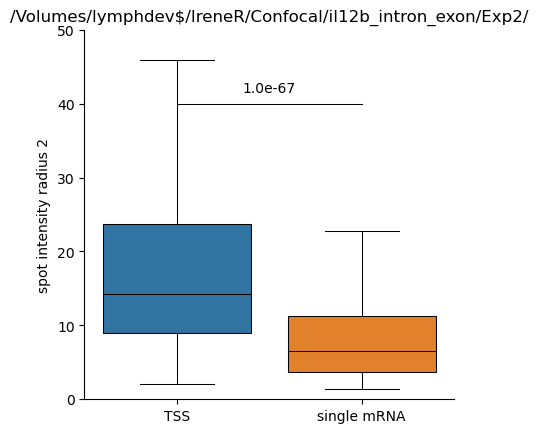

TSSs n: 1092
dots n: 5688


In [9]:
ROOT4 = "/Volumes/lymphdev\$/IreneR/Confocal/il12b_intron_exon/Exp2/"
root1 = ROOT4
expn = 4
gene = "Il12b_intron_original"
tss_c4 = root1 * "Segmentation_type4/_FQ_outline/_TS_detect"
imagesfolder = root1 * "/tiff3D"
typesfolder = root1 * "type4"

quantd = TSSs.quantdots(imagesfolder, typesfolder)


tss_quant = CSV.read("../../Code_Paper/TSS_quantification/TSS_raw/Il12b_intron_original_exp2.csv", DataFrames.DataFrame)



tss_quant1 = tss_quant[!, [:Cell, :Image, :locus1_TSS2, :locus1_int2_TSS2]]
tss_quant2 = tss_quant[!, [:Cell, :Image, :locus2_TSS2, :locus2_int2_TSS2]]
rename!(tss_quant2, :locus2_int2_TSS2 => :Spot_r2 )
rename!(tss_quant1, :locus1_int2_TSS2 => :Spot_r2 )

rename!(tss_quant1, :locus1_TSS2 => :TSS )
rename!(tss_quant2, :locus2_TSS2 => :TSS)

tss_quant = vcat(tss_quant1,tss_quant2)

tss_quant = tss_quant[tss_quant[!,:Spot_r2].!=0.0, :]
tss_quant[!,:TSS_mRNA] = ["TSS" for ii in 1:nrow(tss_quant)]
quantd[!,:TSS_mRNA] = ["single mRNA" for ii in 1:nrow(quantd)]

tb = vcat(tss_quant[!, [:TSS_mRNA, :Spot_r2]], quantd[!, [:TSS_mRNA, :Spot_r2]])

pd = Pandas.DataFrame(tb)
Seaborn.boxplot(data = pd, x = "TSS_mRNA", y = "Spot_r2", showfliers = false)
test = round(pvalue(HypothesisTests.UnequalVarianceTTest(tss_quant[!,:Spot_r2],quantd[!,:Spot_r2])), sigdigits = 1)

plt.plot([0,1],[40, 40])

plt.annotate(string(test), xy = [0.5,42], va = "center", ha = "center")

ylim(0, 50)

title(root1)

pretty_axes2()
squareplot()
xlabel("")
line075black()
ylabel("spot intensity radius 2")

savefigwithtext("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".png")
savefigwithtext("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".svg")
CSV.write("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".csv", tb)
println(string("TSSs n: ", nrow(tss_quant)))
println(string("dots n: ", nrow(quantd)))

Progress: 100%|█████████████████████████████████████████| Time: 0:10:38


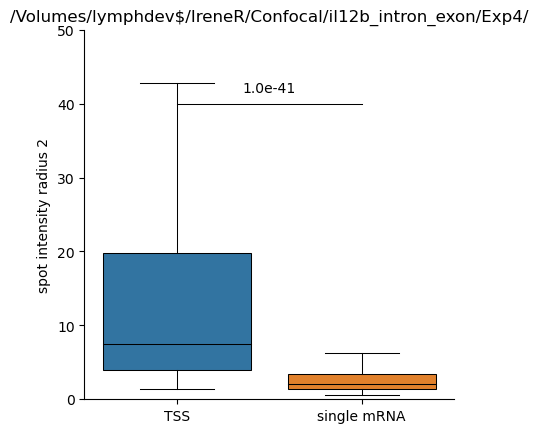

TSSs n: 332
dots n: 1573


In [10]:
ROOT4 = "/Volumes/lymphdev\$/IreneR/Confocal/il12b_intron_exon/Exp4/"
root1 = ROOT4
expn = 4
gene = "Il12b_intron_original"
tss_c4 = root1 * "Segmentation_type4/_FQ_outline/_TS_detect"
imagesfolder = root1 * "/tiff3D"
typesfolder = root1 * "type4"

quantd = TSSs.quantdots(imagesfolder, typesfolder)


tss_quant = CSV.read("../../Code_Paper/TSS_quantification/TSS_raw/Il12b_intron_original_exp3.csv", DataFrames.DataFrame)



tss_quant1 = tss_quant[!, [:Cell, :Image, :locus1_TSS2, :locus1_int2_TSS2]]
tss_quant2 = tss_quant[!, [:Cell, :Image, :locus2_TSS2, :locus2_int2_TSS2]]
rename!(tss_quant2, :locus2_int2_TSS2 => :Spot_r2 )
rename!(tss_quant1, :locus1_int2_TSS2 => :Spot_r2 )

rename!(tss_quant1, :locus1_TSS2 => :TSS )
rename!(tss_quant2, :locus2_TSS2 => :TSS)

tss_quant = vcat(tss_quant1,tss_quant2)

tss_quant = tss_quant[tss_quant[!,:Spot_r2].!=0.0, :]
tss_quant[!,:TSS_mRNA] = ["TSS" for ii in 1:nrow(tss_quant)]
quantd[!,:TSS_mRNA] = ["single mRNA" for ii in 1:nrow(quantd)]

tb = vcat(tss_quant[!, [:TSS_mRNA, :Spot_r2]], quantd[!, [:TSS_mRNA, :Spot_r2]])

pd = Pandas.DataFrame(tb)
Seaborn.boxplot(data = pd, x = "TSS_mRNA", y = "Spot_r2", showfliers = false)
test = round(pvalue(HypothesisTests.UnequalVarianceTTest(tss_quant[!,:Spot_r2],quantd[!,:Spot_r2])), sigdigits = 1)

plt.plot([0,1],[40, 40])

plt.annotate(string(test), xy = [0.5,42], va = "center", ha = "center")

ylim(0, 50)

title(root1)

pretty_axes2()
squareplot()
xlabel("")
line075black()
ylabel("spot intensity radius 2")

savefigwithtext("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".png")
savefigwithtext("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".svg")
CSV.write("spotintensityradius2_"*ROOT4[length(ROOT4)-1]*".csv", tb)
println(string("TSSs n: ", nrow(tss_quant)))
println(string("dots n: ", nrow(quantd)))